<a href="https://colab.research.google.com/github/rahuldevkar5/Data_Science/blob/main/Text_Mining_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
data = pd.read_csv('/content/Reviews.csv')
data = data.head(20000)
data.dropna()

Id  ...                                               Text
0          1  ...  I have bought several of the Vitality canned d...
1          2  ...  Product arrived labeled as Jumbo Salted Peanut...
2          3  ...  This is a confection that has been around a fe...
3          4  ...  If you are looking for the secret ingredient i...
4          5  ...  Great taffy at a great price.  There was a wid...
...      ...  ...                                                ...
19995  19996  ...  Deep River Salt & Vinegar chips are thick and ...
19996  19997  ...  I was very skeptical about buying a brand of c...
19997  19998  ...  Before you turn to other name brands out there...
19998  19999  ...  I was expecting some "serious flavor" as it wa...
19999  20000  ...  I purchased the Salt and Vinegar chips and hav...

[20000 rows x 10 columns]

In [ ]:
data.head()

Id  ...                                               Text
0   1  ...  I have bought several of the Vitality canned d...
1   2  ...  Product arrived labeled as Jumbo Salted Peanut...
2   3  ...  This is a confection that has been around a fe...
3   4  ...  If you are looking for the secret ingredient i...
4   5  ...  Great taffy at a great price.  There was a wid...

[5 rows x 10 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


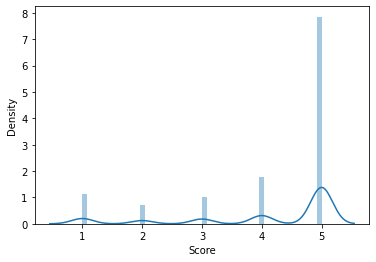

In [ ]:
sns.distplot(data['Score'])

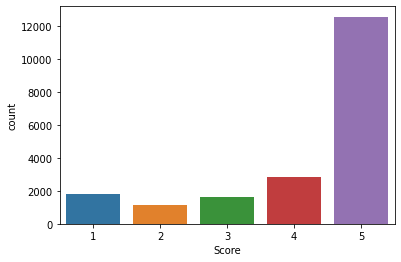

In [ ]:
sns.countplot(x='Score',data=data)

In [ ]:
data['Text'][150]

"This is a fabulous marinade!  I love to use it for chicken, either baked in the oven OR on the grill.  This has enough flavor & flair, I've even used it for dinner parties, only to receive rave reviews from my guests!! DEFINITELY worth the price! Super cheap and super easy! Love it!"

In [ ]:
text_blob_object = TextBlob(data['Text'][150])
print(text_blob_object.sentiment)

Sentiment(polarity=0.2734848484848485, subjectivity=0.6924242424242424)


In [ ]:
def find_pol(review):
  return TextBlob(review).sentiment.polarity

data['Sentiment_Polarity'] = data['Text'].apply(find_pol)
data.head()

Id  ... Sentiment_Polarity
0   1  ...           0.450000
1   2  ...          -0.033333
2   3  ...           0.133571
3   4  ...           0.166667
4   5  ...           0.483333

[5 rows x 11 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


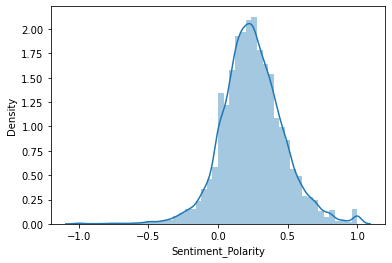

In [ ]:
sns.distplot(data['Sentiment_Polarity'])

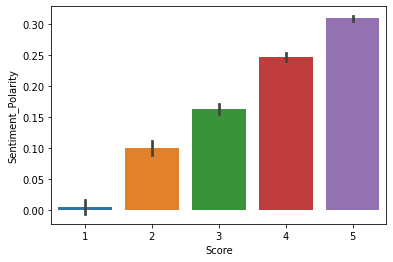

In [ ]:
sns.barplot(x='Score',y='Sentiment_Polarity',data=data)

In [ ]:
negative = data[data.Sentiment_Polarity < 0].Text.head()
print(negative)

1     Product arrived labeled as Jumbo Salted Peanut...
14    The Strawberry Twizzlers are my guilty pleasur...
50    This oatmeal is not good. Its mushy, soft, I d...
52    This wasn't in stock the last time I looked. I...
62    Arrived in 6 days and were so stale i could no...
Name: Text, dtype: object


In [ ]:
data['Text'][52]

"This wasn't in stock the last time I looked. I had to go to the Vermont Country Store in Weston to find it along with a jaw harp, Cranberry Horseradish Sauce, Fartless Black Bean Salsa, Apple Cider Jelly, Newton's Cradle Art in Motion and the staple Vermont Maple Syrup.<br /><br />Back to the Ass Kickin Peanuts. They are hot. They will activate the perspiration glands behind your ears and under your arms. It requires a beverage as advertised, a glass of very cold milk, and a box of Kleenex since it will make your nose run. They look like ordinary peanuts which is already giving me ideas for work. I suspect that some people have been hitting my goodies in my absence, especially my colleague Greg. I'm going to take this to work at earliest opportunity and empty the contents of this can into an ordinary Planters Peanuts can, and then see whose crying or whose nose is running when I return.<br /><br />The can should be shaken to ensure the spices are evenly distributed. It is important to

In [ ]:
positive = data[data.Sentiment_Polarity > 0].Text.head()
print(positive)

0    I have bought several of the Vitality canned d...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
5    I got a wild hair for taffy and ordered this f...
Name: Text, dtype: object


In [ ]:
data['Text'][3]

'If you are looking for the secret ingredient in Robitussin I believe I have found it.  I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda.  The flavor is very medicinal.'